# Predicting deaths in India  

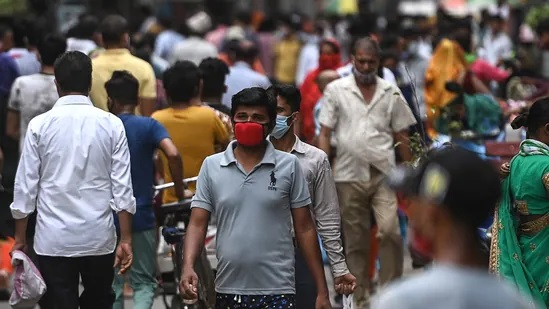

## Introduction

This is a Covid-19 dataset which contains state data stored in multiple directories. Each state's dataset contains 
a "Time", "State", "Confirmed", "Recovered", "Deaths", "Active" and "New Cases" column.

## Understanding Data and Preprocessing before analysis 

### Quick description of the columns:

Time: in format of Year/Month/Day Hours/Minutes/Seconds

State: State in india

Confirmed: Confirmed corona cases

Recovered: The amount of people recovered covid 

Deaths: Deaths from covid (Can only be assumed from confirmed) 

Active: N/A 

New Cases: New cases of Covid-19 per day 

### Concatenating the dataframes from the directories (Commented for runtime)

In [2]:
# name = "C:/Users/flyhi/OneDrive/Desktop/india/Covid19_India_datasets-main/data-Andaman and Nicobar Islands.csv"
# csv_file = Path(name)

# f_to_start = pd.read_csv(csv_file)
# #print(os.listdir())

# #directory = "C:\Users"+ "'\'" +  "flyhi" + "'\'" + "OneDrive" + "'\'" + 'Desktop' + "'\'" + 'india' + "'\'" + "Covid19_India_datasets-main"
# directory = "C:/Users/flyhi/OneDrive/Desktop/india/Covid19_India_datasets-main"
# thing = "C:/Users/flyhi/OneDrive/Desktop/india/Covid19_India_datasets-main/"
# directory = Path(directory)
# #thing = Path(thing)
# for filename in os.listdir(directory):
#     view = thing + filename
#     new = Path(view)
#     isDirectory = os.path.isdir(new)
#     if isDirectory == True:
#         os.chdir(new)
#         csv_file_name =os.listdir()[0]
#         df_to_concat = pd.read_csv(csv_file_name)
#         f_to_start = f_to_start.append(df_to_concat)
#         os.chdir(directory)

### Necessary Imports and Preprocessing Data

In [42]:
from itertools import count
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from pandas._libs import missing 
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression 
import numpy as np 
import seaborn as sns
import missingno as msno

In [45]:
#Reading in data
df = pd.read_csv("combined.csv")

In [46]:
#Dropping bad columns
print(df.head())
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df['Time'] = pd.to_datetime(df['Time'])


   Unnamed: 0  Unnamed: 0.1                 Time                        State  \
0           0             0  2021-04-22 22:52:46  Andaman and Nicobar Islands   
1           1             1  2021-04-23 08:32:03  Andaman and Nicobar Islands   
2           2             2  2021-04-23 23:24:26  Andaman and Nicobar Islands   
3           3             3  2021-04-24 23:24:13  Andaman and Nicobar Islands   
4           4             4  2021-04-25 23:23:44  Andaman and Nicobar Islands   

   Confirmed  Recovered  Deaths  Active  New Cases  
0       5490       5276      64     150        NaN  
1       5527       5309      65     153       37.0  
2       5569       5358      65     146       42.0  
3       5614       5410      66     138       45.0  
4       5665       5467      66     132       51.0  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       2844 non-null   datetime64[ns]
 1   State      2844 non-null   object        
 2   Confirmed  2844 non-null   int64         
 3   Recovered  2844 non-null   int64         
 4   Deaths     2844 non-null   int64         
 5   Active     2844 non-null   int64         
 6   New Cases  2807 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 155.7+ KB
None


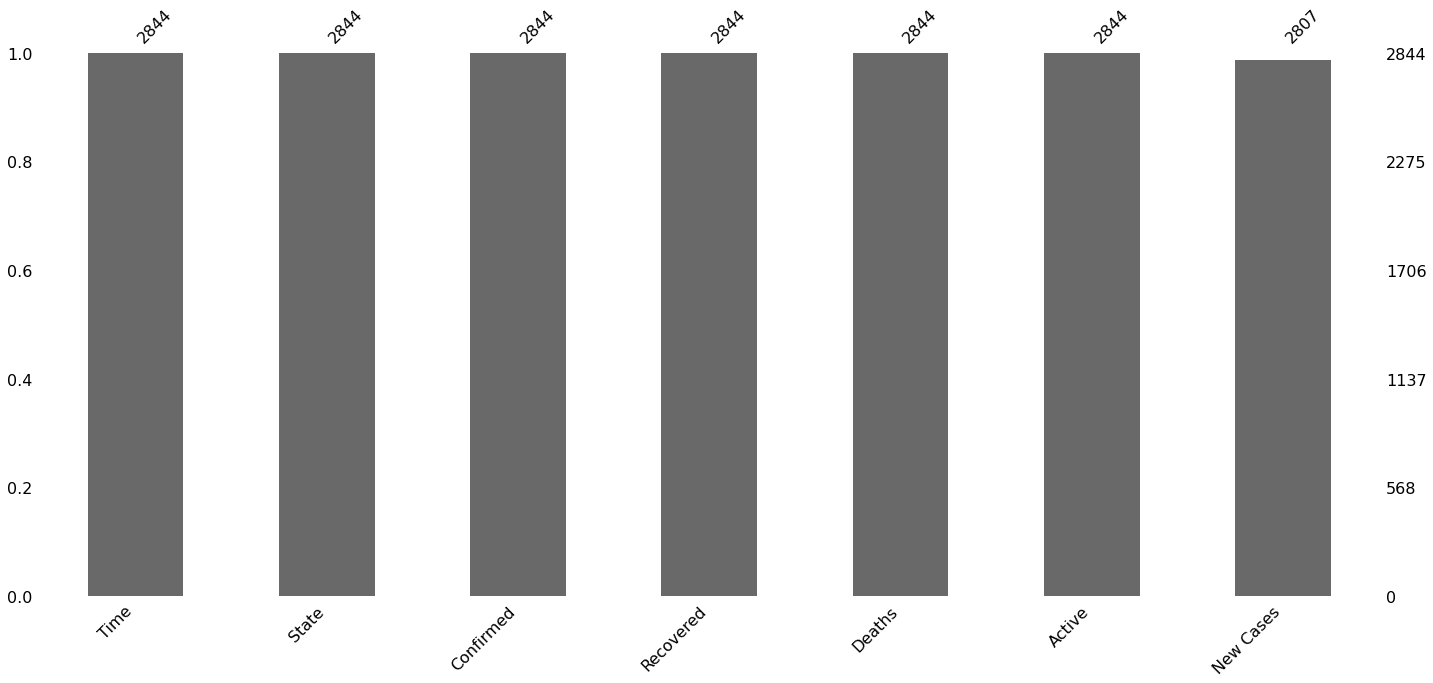

In [47]:
#Dropping rows with Nan values
print(df.info())
msno.bar(df)
plt.show()

missing_set = df[df['New Cases'].notnull()]



## Exploratory data analysis

Viewing the death rate overtime

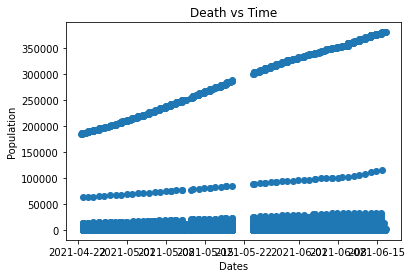

In [38]:
plt.scatter(x=df['Time'], y=df['Deaths'])
plt.xlabel('Date')
plt.ylabel('Population')
plt.title('Death vs Time')
plt.show()


Viewing average case count by state (double click to enlarge graph)

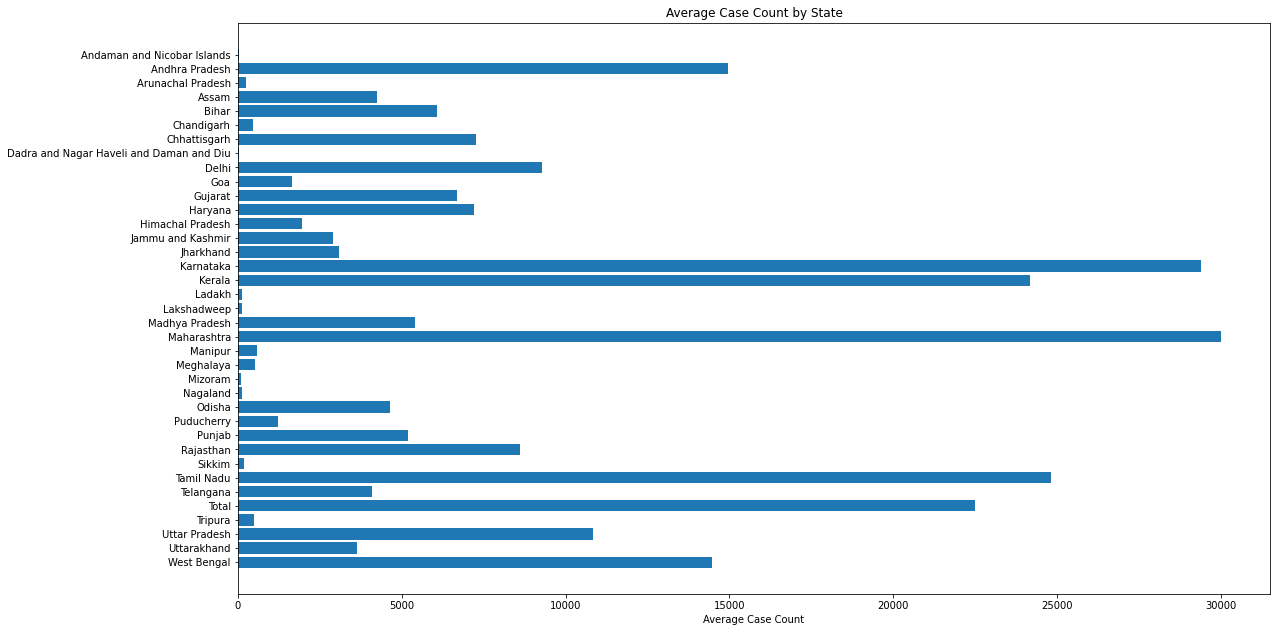

In [31]:
# Average case count by country

fig, ax = plt.subplots() 

#Grouping
vz = missing_set.groupby('State')['New Cases'].agg(['sum', 'count'])
vz['average'] = vz['sum'] / vz['count']


#Setting size of plot

fig.set_size_inches(18.5, 10.5, forward=True)

# Setting Parameters
states = list(vz.index)

# Setting Parameters
y_pos = np.arange(len(list(missing_set['State'].unique())))

# Setting Parameters
performance =  vz['average']

# Setting Parameters
error = np.random.rand(len(y_pos)) 

#Graphing
ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(missing_set['State'].unique()))
ax.invert_yaxis()  
ax.set_xlabel('Average Case Count')
ax.set_title('Average Case Count by State')

plt.show()


Deaths per confirmed case (double click to enlarge graph)

c:\python\python378\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


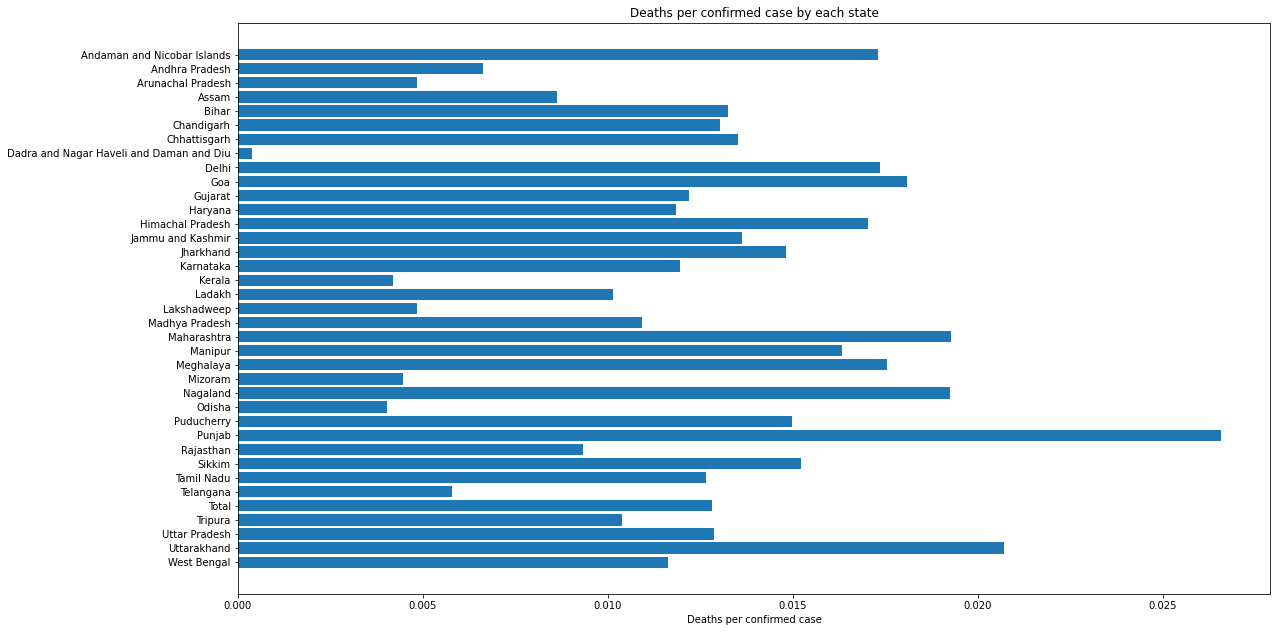

In [35]:
fig, ax = plt.subplots() 
last_row = pd.DataFrame()
for i in missing_set['State'].unique():
    new_df = missing_set[missing_set['State'] == i]
    last_row=last_row.append(new_df.iloc[[0, -1]], ignore_index=True)
    

#Setting size of the figure
fig.set_size_inches(18.5, 10.5, forward=True)

#Setting Parameters
states = list(missing_set['State'].unique())

# setting the y-pos
y_pos = np.arange(len(list(missing_set['State'].unique())))

#Preformance is the values of the actual thing
new_df = last_row.iloc[lambda x: x.index % 2 == 1]

new_df['deaths_to_confirmed'] = new_df['Deaths'] / new_df['Confirmed']

performance = new_df['deaths_to_confirmed']




#Idk error to account for (its that black bar on top of the)
error = np.random.rand(len(y_pos)) 


#Graphing
ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(missing_set['State'].unique()))
ax.invert_yaxis()  
ax.set_xlabel('Deaths per confirmed case')
ax.set_title('Deaths per confirmed case by each state')

plt.show()

Recoveries per confirmed case (double click to enlarge graph)

c:\python\python378\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


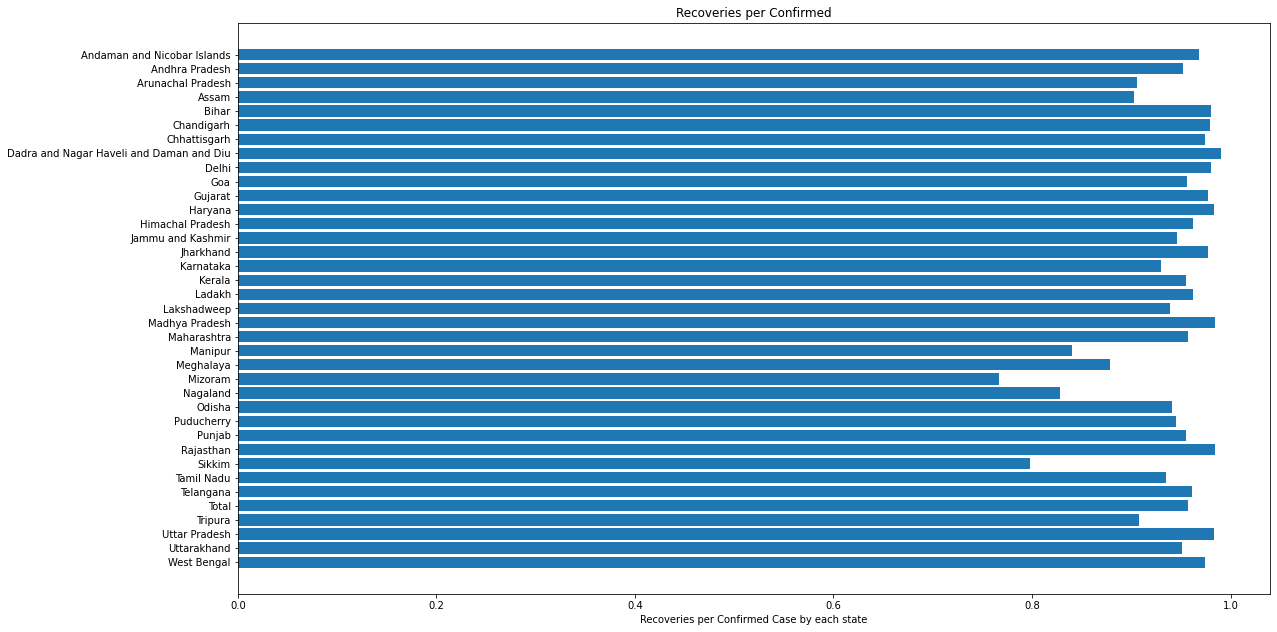

In [48]:

fig, ax = plt.subplots() 
last_row = pd.DataFrame()
for i in missing_set['State'].unique():
    new_df = missing_set[missing_set['State'] == i]
    last_row=last_row.append(new_df.iloc[[0, -1]], ignore_index=True)
    
# Setting Figure Size
fig.set_size_inches(18.5, 10.5, forward=True)

# Setting Parameters
states = list(missing_set['State'].unique())

y_pos = np.arange(len(list(missing_set['State'].unique())))

new_df = last_row.iloc[lambda x: x.index % 2 == 1]

new_df['recoveries_to_confirmed'] = new_df['Recovered'] / new_df['Confirmed']

performance = new_df['recoveries_to_confirmed']

error = np.random.rand(len(y_pos)) 


# Graphing
ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(missing_set['State'].unique()))
ax.invert_yaxis()  
ax.set_xlabel('Recoveries per Confirmed Case by each state')
ax.set_title('Recoveries per Confirmed')

plt.show()

## Conclusion:

### 1. India's death rate is increasing at a linear rate, greater for states that have a higher population.
### 2. Maharashtra is the fastest growing in case count perday on average.
### 3. Punjab is having the greatest deaths per confirmed case. It is over 2.5%, meanining that it is likely that 1/40 people with a confirmed case will die! 
### 4. Rajasthan has the best recovery/confirmed case. meaning, approximately, for every 1 confirmed case about 1 person recovers from covid.

<p>&nbsp;</p>

Here are two articles which validated my analysis:



Point 2:
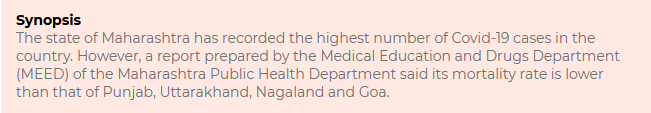
link: https://economictimes.indiatimes.com/news/india/maha-mortality-rate-less-than-punjab-ukhand-nagaland-goa/articleshow/83351837.cms

Point 3:

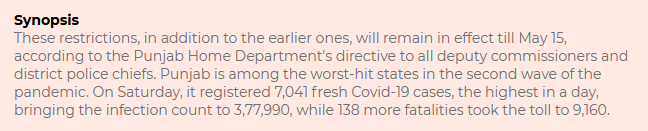
link: https://economictimes.indiatimes.com/news/india/not-more-than-2-to-be-allowed-in-cars-negative-covid-test-report-must-for-entering-punjab/articleshow/82359030.cms

<p>&nbsp;</p>
<p>&nbsp;</p>

## Modeling and predicting 

In [ ]:
#Selecting and processing features

plt.figure(figsize=(15,8))
sns.heatmap(missing_set.corr(), annot=True, linewidths=1)
plt.show()

To account for multicollinearity, I will omit the "Recovered" column as one of the features as its not only redundant but also doesnt make sense as a feature for predicting and also due to its high VIF value.

In [51]:
forecast_out = 10
x = np.array(missing_set[['Confirmed', 'Active', 'New Cases']])
#x = preprocessing.scale(x)
x= x[:-forecast_out]
x_predict = x[-forecast_out:]
y = np.array(missing_set['Deaths'])
y = y[:-forecast_out]


#Trainig
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)


#Our linear classifier
clf = LinearRegression()
clf.fit(x_train, y_train)

#Accuracy
accuracy = clf.score(x_test, y_test)
print("Accuracy: " + str(100*accuracy) + "%")

Accuracy: 99.81896210423949%
